In [2]:

import numpy as np
import matplotlib.pyplot as plt
from cpymad.madx import Madx
from pybt.tools.plotters import *
from madxtools.plot_tool import *
import requests
from madxtools.air_scattering import *
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display

In [3]:
instrument_focal_point = "t08.tab078" # IRRAD Table 1

In [4]:
nominal_optics = [
    0.479688,
    0.21,
    0.19864,
    0.090343,
    0.195989,
    0.194437,
    0.061494,
    0.069052,
]

In [5]:
E_cin_per_nucleon = 2.0
# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

gamma = p/charge/0.938
beta = np.sqrt(1-gamma**(-2))
exn=1.5e-6
eyn=1.5e-6
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

print(p/charge)
print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p/charge,3)} GeV/c")

Brho = 3.33564*p/charge

10.706294697042374
gamma = 11.414
beta = 0.996
p = 10.706 GeV/c


/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:168: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

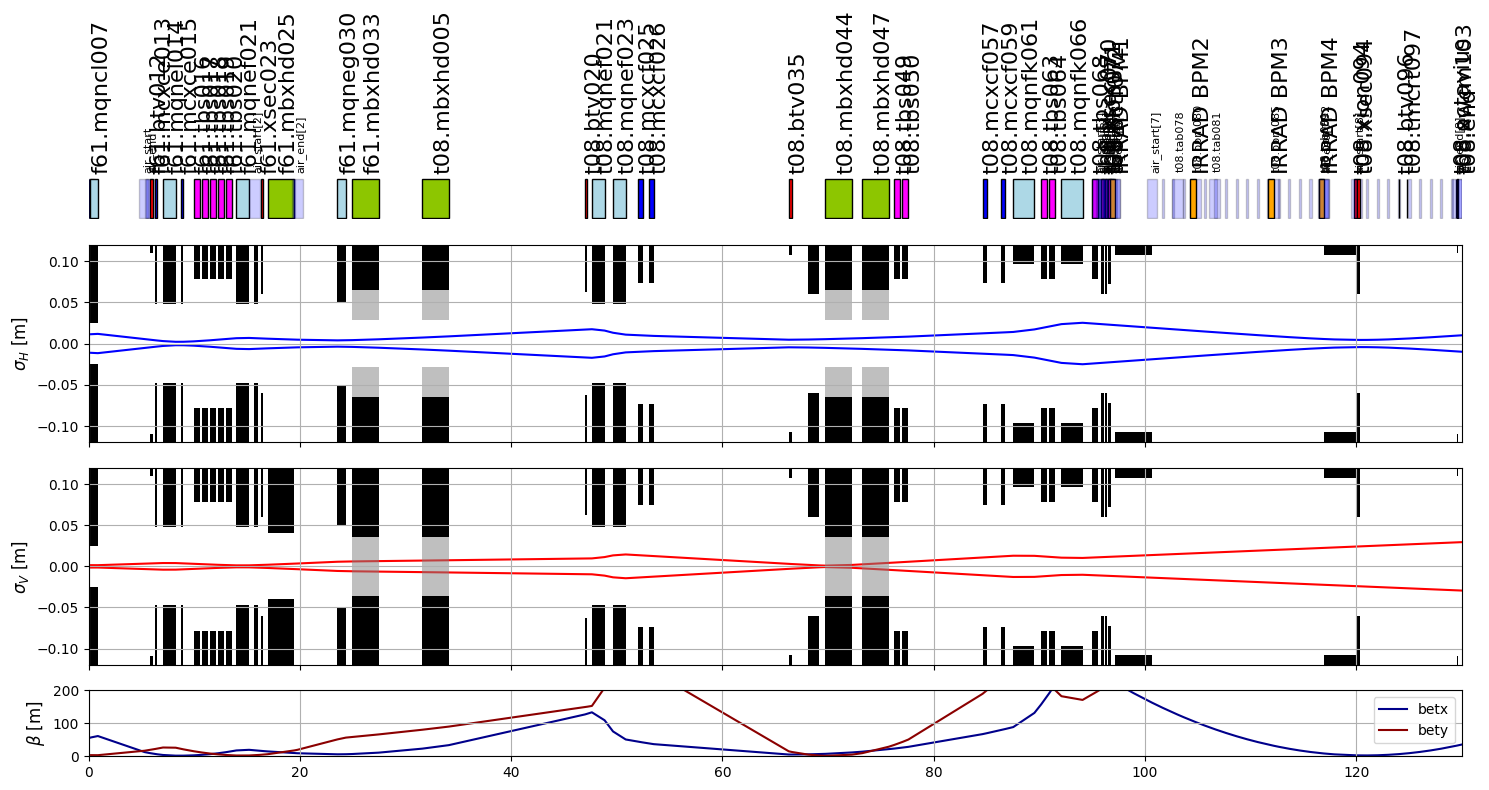

In [6]:
# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

# Optics
optics = nominal_optics
madx.input("kQFN1 = "+str(optics[0])+";")
madx.input("kQDN2 = "+str(-optics[1])+";")
madx.input("kQFN3 = "+str(optics[2])+";")
madx.input("kQDN4 = "+str(-optics[3])+";")
madx.input("kQFN5 = "+str(optics[4])+";")
madx.input("kQDN6 = "+str(-optics[5])+";")
madx.input("kQDN7 = "+str(-optics[6])+";")
madx.input("kQFN8 = "+str(optics[7])+";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")


twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])


In [7]:
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, Layout, widgets

# Define nominal optics values again for clarity
nominal_optics = [
    0.479688,
    0.21,
    0.19864,
    0.090343,
    0.195989,
    0.194437,
    0.061494,
    0.069052,
]

# Define a function to update the MADX input based on slider values
def update_madx(kQFN1, kQDN2, kQFN3, kQDN4, kQFN5, kQDN6, kQDN7, kQFN8):
    madx.input(f"kQFN1 = {kQFN1};")
    madx.input(f"kQDN2 = {-kQDN2};")
    madx.input(f"kQFN3 = {kQFN3};")
    madx.input(f"kQDN4 = {-kQDN4};")
    madx.input(f"kQFN5 = {kQFN5};")
    madx.input(f"kQDN6 = {-kQDN6};")
    madx.input(f"kQDN7 = {-kQDN7};")
    madx.input(f"kQFN8 = {kQFN8};")
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

    fig, ax = plt.subplots(3,1, figsize=(10, 6))  # Changed to use subplots
    draw_synoptic(ax[0], twiss)
    draw_aperture_circle(ax[1], twiss, "aper_1")
    draw_aperture_circle(ax[2], twiss, "aper_1")
    draw_aperture_rectangle(ax[1], twiss, "aper_1")
    draw_aperture_rectangle(ax[2], twiss, "aper_2")
    draw_aperture_racetrackH(ax[1], twiss, "aper_1", "aper_2", "aper_3", "aper_4")
    draw_aperture_racetrackV(ax[2], twiss, "aper_1", "aper_2", "aper_3", "aper_4")

    ax[1].plot(twiss['s'], beam_size(twiss['betx'], twiss['dx'], ex, sige, 1)+twiss.x, alpha=1.0, color ="b", zorder=0)
    ax[1].plot(twiss['s'], -beam_size(twiss['betx'], twiss['dx'], ex, sige, 1)+twiss.x, alpha=1.0, color ="b", zorder=0)
    ax[2].plot(twiss['s'], beam_size(twiss['bety'], twiss['dy'], ey, sige, 1)+twiss.y, alpha=1.0, color ="r", zorder=0)
    ax[2].plot(twiss['s'], -beam_size(twiss['bety'], twiss['dy'], ey, sige, 1)+twiss.y, alpha=1.0, color ="r", zorder=0)
    ax[1].set_xlim(0,twiss.iloc[-1].s)
    ax[1].set_ylim(-0.1, 0.1)
    ax[2].set_xlim(0,twiss.iloc[-1].s)
    ax[2].set_ylim(-0.1, 0.1)
    plt.show()


# And assuming the sliders dictionary is created like this:
    
sliders = {
    'kQFN1': FloatSlider(value=0.479688, min=0.0, max=0.53823, step=0.001, description='kQFN1:'),
    'kQDN2': FloatSlider(value=0.21, min=0.0, max=0.221974, step=0.001, description='kQDN2:'),
    'kQFN3': FloatSlider(value=0.19864, min=0.0, max=0.215518, step=0.001, description='kQFN3:'),
    'kQDN4': FloatSlider(value=0.090343, min=0.0, max=0.103435, step=0.001, description='kQDN4:'),
    'kQFN5': FloatSlider(value=0.195989, min=0.0, max=0.219329, step=0.001, description='kQFN5:'),
    'kQDN6': FloatSlider(value=0.194437, min=0.0, max=0.219329, step=0.001, description='kQDN6:'),
    'kQDN7': FloatSlider(value=0.061494, min=0.0, max=0.104392, step=0.001, description='kQDN7:'),
    'kQFN8': FloatSlider(value=0.069052, min=0.0, max=0.109391, step=0.001, description='kQFN8:')
}

# Create the interactive widget
interactive_plot = interactive(update_madx, **sliders)

# Adjust the output layout if necessary
output = interactive_plot.children[-1]
output.layout.height = '700px'

# Display the interactive plot with sliders
display(interactive_plot)


interactive(children=(FloatSlider(value=0.479688, description='kQFN1:', max=0.53823, step=0.001), FloatSlider(…

17.9559 mm
15.7831 mm


/Users/eliottjohnson/miniforge3/envs/xsuite-arm/lib/python3.11/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_22272/283154930.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss_scattered.s[-1])
/var/folders/8q/l42hhsl13fxd0py0_2dw6k900000gn/T/ipykernel_22272/283154930.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

Text(0.85, 0.95, 'Optics:\nkQFN1 = 0.479688\nkQDN2 = -0.21\nkQFN3 = 0.19864\nkQDN4 = -0.090343\nkQFN5 = 0.195989\nkQDN6 = -0.194437\nkQDN7 = -0.061494\nkQFN8 = 0.069052\nIRRAD Table 1 Beam size:\n18.0 mm\n15.8 mm')

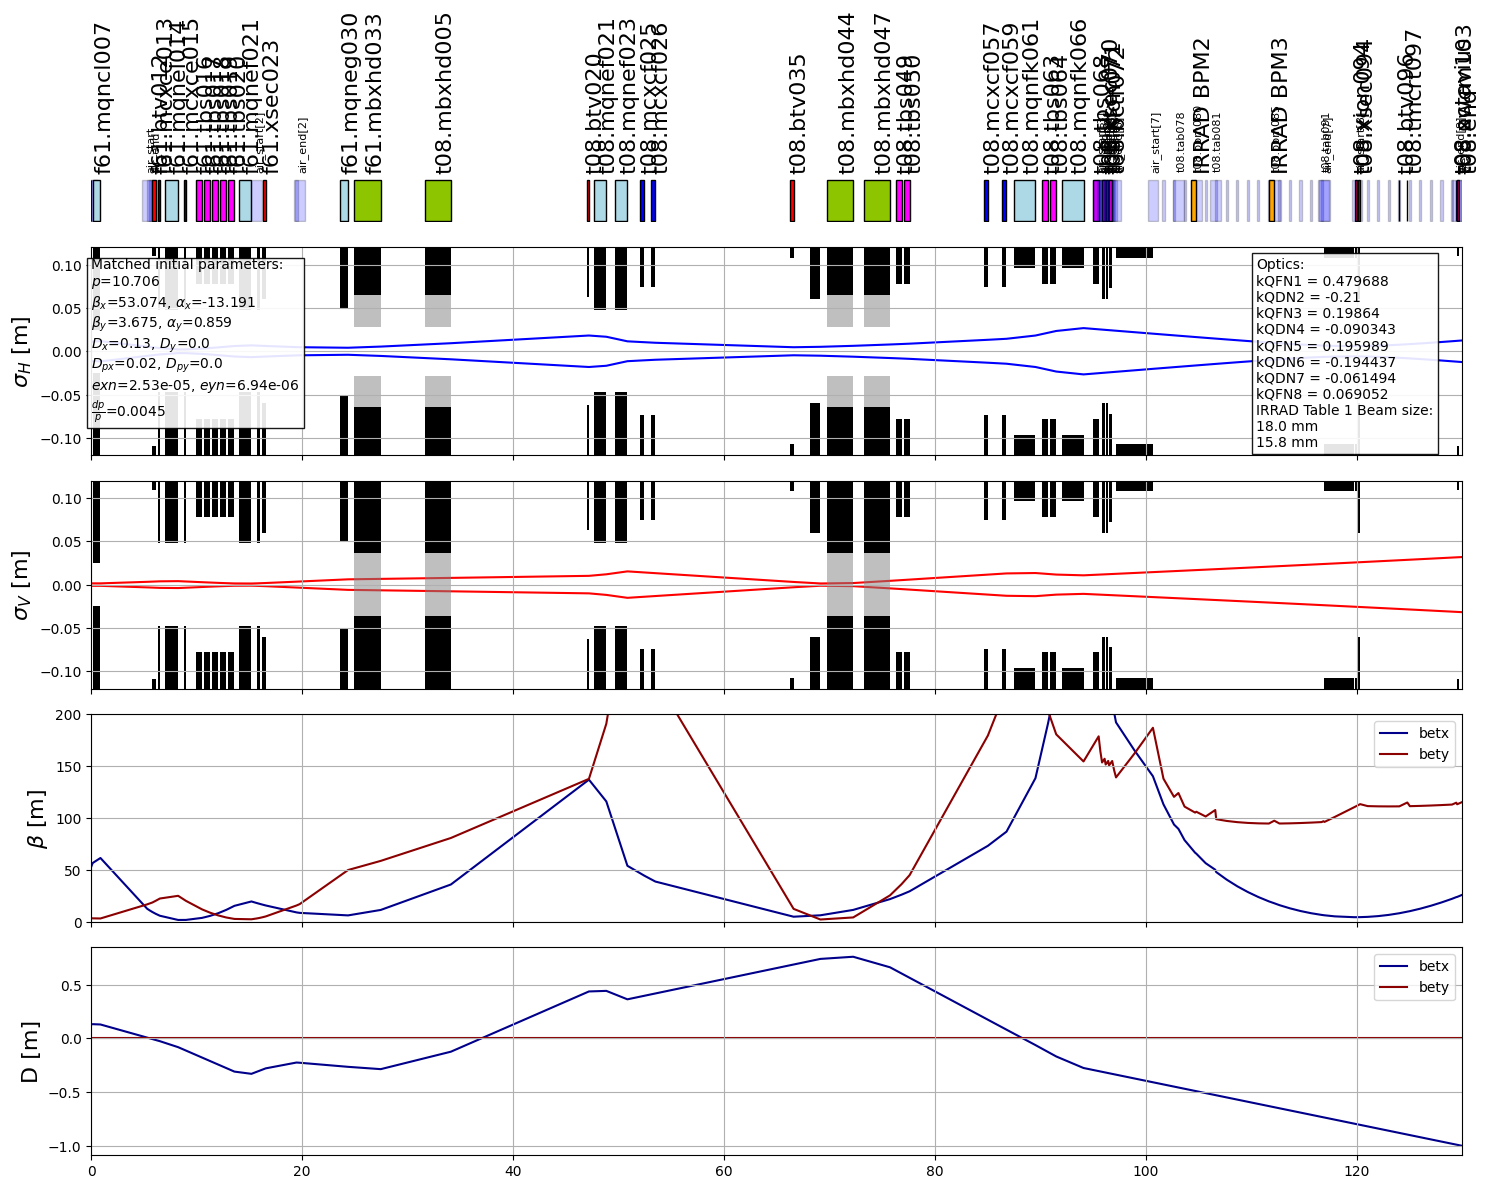

In [8]:

# Air scattering
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

fontsize=16
figsize=(15,12)
height_ratios=[1,3,3,3,3]
fig, ax = plt.subplots(5,1, figsize=figsize, tight_layout=True, sharex=True, height_ratios=height_ratios)
    
draw_synoptic(ax[0], twiss_scattered)

ax[1].plot(twiss_scattered['s'], beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0)
ax[1].plot(twiss_scattered['s'], -beam_size(twiss_scattered['betx'], twiss_scattered['dx'], twiss_scattered['ex'], sige, 1)+twiss_scattered.x, alpha=1.0, color ="b", zorder=0)
ax[1].set_xlim(0,twiss_scattered.s[-1])

ax[2].plot(twiss_scattered['s'], beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].plot(twiss_scattered['s'], -beam_size(twiss_scattered['bety'], twiss_scattered['dy'], twiss_scattered['ey'], sige, 1)+twiss_scattered.y, alpha=1.0, color ="r", zorder=0)
ax[2].set_xlim(0,twiss_scattered.s[-1])

ax[1].grid()
ax[1].set_ylim(-0.12, 0.12)
ax[1].set_ylabel(r"$\sigma_{H}$ [m]", fontsize=fontsize)

ax[2].grid()
ax[2].set_ylim(-0.12, 0.12)
ax[2].set_ylabel(r"$\sigma_{V}$ [m]", fontsize=fontsize)

ax[3].plot(twiss_scattered.s, twiss_scattered.betx, alpha=1.0, color ="darkblue", zorder=0, label="betx")
ax[3].plot(twiss_scattered.s, twiss_scattered.bety, alpha=1.0, color ="darkred", zorder=0, label="bety")
ax[3].set_xlim(0,twiss_scattered.s[-1])

ax[3].legend()
ax[3].set_ylim(0, 200)
ax[3].grid()
ax[3].set_ylabel(r"$\beta$ [m]", fontsize=fontsize)

ax[4].plot(twiss_scattered.s, twiss_scattered.dx, alpha=1.0, color ="darkblue", zorder=0, label="betx")
ax[4].plot(twiss_scattered.s, twiss_scattered.dy, alpha=1.0, color ="darkred", zorder=0, label="bety")
ax[4].set_xlim(0,twiss_scattered.s[-1])

ax[4].legend()
# ax[4].set_ylim(0, 200)
ax[4].grid()
ax[4].set_ylabel(f"D [m]", fontsize=fontsize)

draw_aperture_circle(ax[1], twiss_scattered, "aper_1")
draw_aperture_circle(ax[2], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[1], twiss_scattered, "aper_1")
draw_aperture_rectangle(ax[2], twiss_scattered, "aper_2")
draw_aperture_racetrackH(ax[1], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")
draw_aperture_racetrackV(ax[2], twiss_scattered, "aper_1", "aper_2", "aper_3", "aper_4")

# Box with initial parameters
textstr = '\n'.join((
    "Matched initial parameters:",
    r'$p$='+str(round(p/charge,3)),
    r'$\beta_{x}$='+str(round(betx0,3))+r', $\alpha_{x}$='+str(round(alfx0,3)),
    r'$\beta_{y}$='+str(round(bety0,3))+r', $\alpha_{y}$='+str(round(alfy0,3)),
    r'$D_{x}$='+str(round(dx0,3))+r', $D_{y}$='+str(round(dy0,3)),
    r'$D_{px}$='+str(round(dpx0,3))+r', $D_{py}$='+str(round(dpy0,3)),
    r'$exn$='+str(round(exn,8))+r', $eyn$='+str(round(eyn,8)),
    r'$\frac{dp}{p}$='+str(round(sige,6)),
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# Place a text box in upper left in axes coords
ax[1].text(0., 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


x_beam_size = beam_size(twiss_scattered['betx'][instrument_focal_point], twiss_scattered['dx'][instrument_focal_point], twiss_scattered['ex'][instrument_focal_point], sige, 1)
y_beam_size = beam_size(twiss_scattered['bety'][instrument_focal_point], twiss_scattered['dy'][instrument_focal_point], twiss_scattered['ey'][instrument_focal_point], sige, 1)

print(f"{round(x_beam_size*1000, 4)} mm")
print(f"{round(y_beam_size*1000, 4)} mm")

# Box with optics
textstr = '\n'.join((
    "Optics:",
    "kQFN1 = "+str(round(optics[0],6)),
    "kQDN2 = "+str(round(-optics[1],6)),
    "kQFN3 = "+str(round(optics[2],6)),
    "kQDN4 = "+str(round(-optics[3],6)),
    "kQFN5 = "+str(round(optics[4],6)),
    "kQDN6 = "+str(round(-optics[5],6)),
    "kQDN7 = "+str(round(-optics[6],6)),
    "kQFN8 = "+str(round(optics[7],6)),
    "IRRAD Table 1 Beam size:",
    str(round(x_beam_size*1000, 1))+" mm",
    str(round(y_beam_size*1000, 1))+" mm",
    ))

props = dict(boxstyle='square', facecolor='white', alpha=0.9)

# place a text box in upper left in axes coords
ax[1].text(0.85, 0.95, textstr, transform=ax[1].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)